In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# import shapely
# from shapely import wkt
sns.set(style='darkgrid')
% matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

In [115]:
%pwd

'C:\\Users\\Michal_schudnij\\Desktop\\Spatial_eco\\repo\\codes'

In [116]:
df_warszawa = pd.read_csv("../datasets/preprocessed_data/df_warszawa_gwr_niepelny.csv")
df_krakow = pd.read_csv("../datasets/preprocessed_data/df_krakow_gwr_niepelny.csv")
df_poznan = pd.read_csv("../datasets/preprocessed_data/df_poznan_gwr_niepelny.csv")

In [117]:
df_warszawa.head()

,buffer_index,jpt_nazwa_,operator,point_id,center,buffer,inpost_points,poczta_points,dhl_points,ruch_points,...,TOT_65__,TOT_MALE,TOT_FEM,MALE_0_14,MALE_15_64,MALE_65__,FEM_0_14,FEM_15_64,FEM_65__,FEM_RATIO
0,2709,powiat Warszawa,inpost,18334,POINT (21.0303 52.3169),"POLYGON ((21.03765588883248 52.31689977156337,...",2,0.0,0.0,0.0,...,32.00,240.25,251.50,59.00,165.00,16.25,57.25,178.5,15.75,103.493095
1,2711,powiat Warszawa,inpost,11787,POINT (20.99999 52.31708),"POLYGON ((21.00734591875068 52.31707977156189,...",1,1.0,3.0,0.0,...,39.75,92.25,106.75,10.75,69.75,12.25,10.25,68.5,28.00,103.576308
2,2713,powiat Warszawa,inpost,9475,POINT (21.0302805409061 52.3174329976903),"POLYGON ((21.03763651833026 52.31743276924928,...",3,0.0,0.0,0.0,...,32.00,240.25,251.50,59.00,165.00,16.25,57.25,178.5,15.75,103.493095
3,2714,powiat Warszawa,inpost,35467,POINT (21.03759 52.31755),"POLYGON ((21.04494599687195 52.31754977155803,...",2,0.0,0.0,0.0,...,32.00,240.25,251.50,59.00,165.00,16.25,57.25,178.5,15.75,103.493095
4,2715,powiat Warszawa,inpost,11434,POINT (21.05028 52.31764),"POLYGON ((21.05763601183158 52.31763977155728,...",2,2.0,1.0,0.0,...,70.25,1039.00,1139.75,308.50,699.50,31.00,290.50,810.0,39.25,108.008928


In [118]:
df_warszawa['center'][0][7:]

'21.0303 52.3169)'

In [119]:
# df_warszawa['z'], df_warszawa['y'] = df_warszawa['center'][0].split('(')
# df_warszawa['lon'], df_warszawa['lat'] = df_warszawa['y'][0].split(' ')
# df_warszawa['xxx'], df_warszawa['yyyy'] = df_warszawa['lat'][0].split(')')

In [120]:
df_warszawa = pd.read_csv("../datasets/preprocessed_data/df_warszawa_gwr_niepelny.csv")
df_warszawa[['remove', 'long']] = df_warszawa['center'].str.split('(', expand=True)
df_warszawa[['long', 'lat']] = df_warszawa['long'].str.split(' ', expand=True)
df_warszawa[['lat', 'remove2']] = df_warszawa['lat'].str.split(')', expand=True)

In [121]:
df_warszawa.head()

,buffer_index,jpt_nazwa_,operator,point_id,center,buffer,inpost_points,poczta_points,dhl_points,ruch_points,...,MALE_15_64,MALE_65__,FEM_0_14,FEM_15_64,FEM_65__,FEM_RATIO,remove,long,lat,remove2
0,2709,powiat Warszawa,inpost,18334,POINT (21.0303 52.3169),"POLYGON ((21.03765588883248 52.31689977156337,...",2,0.0,0.0,0.0,...,165.00,16.25,57.25,178.5,15.75,103.493095,POINT,21.0303,52.3169,
1,2711,powiat Warszawa,inpost,11787,POINT (20.99999 52.31708),"POLYGON ((21.00734591875068 52.31707977156189,...",1,1.0,3.0,0.0,...,69.75,12.25,10.25,68.5,28.00,103.576308,POINT,20.99999,52.31708,
2,2713,powiat Warszawa,inpost,9475,POINT (21.0302805409061 52.3174329976903),"POLYGON ((21.03763651833026 52.31743276924928,...",3,0.0,0.0,0.0,...,165.00,16.25,57.25,178.5,15.75,103.493095,POINT,21.0302805409061,52.3174329976903,
3,2714,powiat Warszawa,inpost,35467,POINT (21.03759 52.31755),"POLYGON ((21.04494599687195 52.31754977155803,...",2,0.0,0.0,0.0,...,165.00,16.25,57.25,178.5,15.75,103.493095,POINT,21.03759,52.31755,
4,2715,powiat Warszawa,inpost,11434,POINT (21.05028 52.31764),"POLYGON ((21.05763601183158 52.31763977155728,...",2,2.0,1.0,0.0,...,699.50,31.00,290.50,810.0,39.25,108.008928,POINT,21.05028,52.31764,


In [122]:
df = pd.concat([df_warszawa, df_krakow, df_poznan])

In [123]:
df.head()

,buffer_index,jpt_nazwa_,operator,point_id,center,buffer,inpost_points,poczta_points,dhl_points,ruch_points,...,MALE_15_64,MALE_65__,FEM_0_14,FEM_15_64,FEM_65__,FEM_RATIO,remove,long,lat,remove2
0,2709,powiat Warszawa,inpost,18334,POINT (21.0303 52.3169),"POLYGON ((21.03765588883248 52.31689977156337,...",2,0.0,0.0,0.0,...,165.00,16.25,57.25,178.5,15.75,103.493095,POINT,21.0303,52.3169,
1,2711,powiat Warszawa,inpost,11787,POINT (20.99999 52.31708),"POLYGON ((21.00734591875068 52.31707977156189,...",1,1.0,3.0,0.0,...,69.75,12.25,10.25,68.5,28.00,103.576308,POINT,20.99999,52.31708,
2,2713,powiat Warszawa,inpost,9475,POINT (21.0302805409061 52.3174329976903),"POLYGON ((21.03763651833026 52.31743276924928,...",3,0.0,0.0,0.0,...,165.00,16.25,57.25,178.5,15.75,103.493095,POINT,21.0302805409061,52.3174329976903,
3,2714,powiat Warszawa,inpost,35467,POINT (21.03759 52.31755),"POLYGON ((21.04494599687195 52.31754977155803,...",2,0.0,0.0,0.0,...,165.00,16.25,57.25,178.5,15.75,103.493095,POINT,21.03759,52.31755,
4,2715,powiat Warszawa,inpost,11434,POINT (21.05028 52.31764),"POLYGON ((21.05763601183158 52.31763977155728,...",2,2.0,1.0,0.0,...,699.50,31.00,290.50,810.0,39.25,108.008928,POINT,21.05028,52.31764,


In [124]:
df = df.drop(columns = {'operator', 'buffer'})

In [125]:
df.head()

,buffer_index,jpt_nazwa_,point_id,center,inpost_points,poczta_points,dhl_points,ruch_points,dpd_points,ups_points,...,MALE_15_64,MALE_65__,FEM_0_14,FEM_15_64,FEM_65__,FEM_RATIO,remove,long,lat,remove2
0,2709,powiat Warszawa,18334,POINT (21.0303 52.3169),2,0.0,0.0,0.0,1.0,1.0,...,165.00,16.25,57.25,178.5,15.75,103.493095,POINT,21.0303,52.3169,
1,2711,powiat Warszawa,11787,POINT (20.99999 52.31708),1,1.0,3.0,0.0,1.0,0.0,...,69.75,12.25,10.25,68.5,28.00,103.576308,POINT,20.99999,52.31708,
2,2713,powiat Warszawa,9475,POINT (21.0302805409061 52.3174329976903),3,0.0,0.0,0.0,1.0,1.0,...,165.00,16.25,57.25,178.5,15.75,103.493095,POINT,21.0302805409061,52.3174329976903,
3,2714,powiat Warszawa,35467,POINT (21.03759 52.31755),2,0.0,0.0,0.0,0.0,1.0,...,165.00,16.25,57.25,178.5,15.75,103.493095,POINT,21.03759,52.31755,
4,2715,powiat Warszawa,11434,POINT (21.05028 52.31764),2,2.0,1.0,0.0,2.0,0.0,...,699.50,31.00,290.50,810.0,39.25,108.008928,POINT,21.05028,52.31764,


In [126]:
import shapely
from shapely.geometry import Point
import shapely.wkt
df['geometry'] = df.apply(lambda x: shapely.wkt.loads(x['center']), axis=1)

In [127]:
df_geo = gpd.GeoDataFrame(df, geometry = 'geometry', crs = "epsg:4258")

In [128]:
import mgwr

In [129]:
import numpy as np
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

In [130]:
from mgwr.utils import compare_surfaces, truncate_colormap

c:\users\michal_schudnij\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


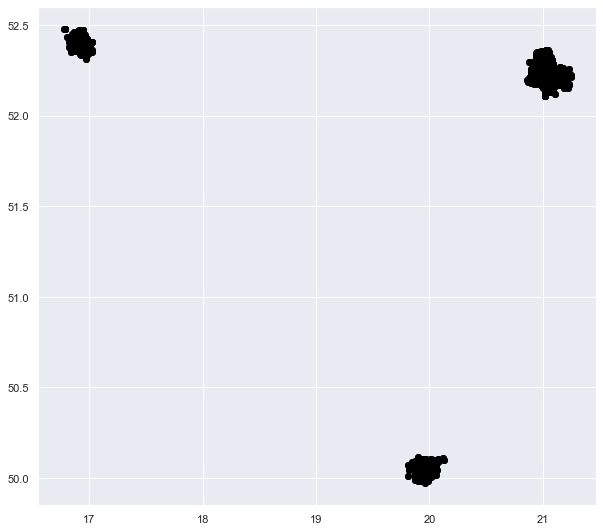

In [131]:
fig, ax = plt.subplots(figsize = (10, 10))
df_geo.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'})
df_geo.centroid.plot(ax = ax, c = 'black')
plt.savefig('georgia_shp')
plt.show()

In [132]:
import shapely
from shapely.geometry import Point
import shapely.wkt
df_warszawa['geometry'] = df_warszawa.apply(lambda x: shapely.wkt.loads(x['center']), axis=1)

df_geo = gpd.GeoDataFrame(df_warszawa, geometry = 'geometry', crs = "epsg:4258")

In [133]:
df_geo.head()

,buffer_index,jpt_nazwa_,operator,point_id,center,buffer,inpost_points,poczta_points,dhl_points,ruch_points,...,MALE_65__,FEM_0_14,FEM_15_64,FEM_65__,FEM_RATIO,remove,long,lat,remove2,geometry
0,2709,powiat Warszawa,inpost,18334,POINT (21.0303 52.3169),"POLYGON ((21.03765588883248 52.31689977156337,...",2,0.0,0.0,0.0,...,16.25,57.25,178.5,15.75,103.493095,POINT,21.0303,52.3169,,POINT (21.03030 52.31690)
1,2711,powiat Warszawa,inpost,11787,POINT (20.99999 52.31708),"POLYGON ((21.00734591875068 52.31707977156189,...",1,1.0,3.0,0.0,...,12.25,10.25,68.5,28.00,103.576308,POINT,20.99999,52.31708,,POINT (20.99999 52.31708)
2,2713,powiat Warszawa,inpost,9475,POINT (21.0302805409061 52.3174329976903),"POLYGON ((21.03763651833026 52.31743276924928,...",3,0.0,0.0,0.0,...,16.25,57.25,178.5,15.75,103.493095,POINT,21.0302805409061,52.3174329976903,,POINT (21.03028 52.31743)
3,2714,powiat Warszawa,inpost,35467,POINT (21.03759 52.31755),"POLYGON ((21.04494599687195 52.31754977155803,...",2,0.0,0.0,0.0,...,16.25,57.25,178.5,15.75,103.493095,POINT,21.03759,52.31755,,POINT (21.03759 52.31755)
4,2715,powiat Warszawa,inpost,11434,POINT (21.05028 52.31764),"POLYGON ((21.05763601183158 52.31763977155728,...",2,2.0,1.0,0.0,...,31.00,290.50,810.0,39.25,108.008928,POINT,21.05028,52.31764,,POINT (21.05028 52.31764)


In [134]:
df_geo['center'][1]

'POINT (20.99999 52.31708)'

In [135]:
df_geo['long'] = df_geo['long'].astype(float)

In [136]:
df_geo['lat'] = df_geo['lat'].astype(float)

In [137]:
df_geo.columns.to_list()

['buffer_index',
 'jpt_nazwa_',
 'operator',
 'point_id',
 'center',
 'buffer',
 'inpost_points',
 'poczta_points',
 'dhl_points',
 'ruch_points',
 'dpd_points',
 'ups_points',
 'fedex_points',
 'TOT',
 'TOT_0_14',
 'TOT_15_64',
 'TOT_65__',
 'TOT_MALE',
 'TOT_FEM',
 'MALE_0_14',
 'MALE_15_64',
 'MALE_65__',
 'FEM_0_14',
 'FEM_15_64',
 'FEM_65__',
 'FEM_RATIO',
 'remove',
 'long',
 'lat',
 'remove2',
 'geometry']

In [167]:
g_y = df_geo['inpost_points'].values.reshape((-1, 1))
g_X = df_geo[['poczta_points', 'dhl_points', 'ruch_points', 'dpd_points', 'ups_points', 'TOT','FEM_RATIO']].values
#'poczta_points', 'dhl_points', 'ruch_points', 'dpd_points', 'ups_points', 'TOT','TOT_0_14','TOT_15_64','TOT_65__','TOT_MALE','TOT_FEM','MALE_0_14','MALE_15_64','MALE_65__','FEM_0_14','FEM_15_64','FEM_65__','FEM_RATIO'
u = df_geo['long']
v = df_geo['lat']
g_coords = list(zip(u, v))

In [168]:
selector = Sel_BW(g_coords, g_y, g_X)

In [169]:
g_X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 4.91750000e+02, 1.03493095e+02],
       [1.00000000e+00, 3.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.99500000e+02, 1.03576308e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 4.91750000e+02, 1.03493095e+02],
       ...,
       [1.80000000e+01, 2.20000000e+01, 2.00000000e+00, ...,
        0.00000000e+00, 9.48600000e+03, 1.20462758e+02],
       [6.00000000e+00, 6.00000000e+00, 2.00000000e+00, ...,
        1.00000000e+00, 8.47700000e+03, 1.20210322e+02],
       [8.00000000e+00, 8.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 8.47700000e+03, 1.20210322e+02]])

In [170]:
bw = selector.search()

In [171]:
print(bw)

59.0


In [172]:
# bw = selector.search(search_method = 'interval',
# interval = 2,
# bw_min = 30,
# bw_max = 100)

In [173]:
print(bw)

59.0


In [174]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search()
print(gwr_bw)

59.0


In [175]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit()
print(gwr_results.resid_ss)

939.70768120749


In [176]:
gwr_model = GWR(g_coords, g_y, g_X, 47)
gwr_results = gwr_model.fit()
print(gwr_results.resid_ss)

755.4962013102672


c:\users\michal_schudnij\appdata\local\programs\python\python36-32\lib\site-packages\spglm\iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=3.02404e-22): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)


In [177]:
# fig, ax = plt.subplots(2, 3, figsize = (10, 8))
# bws = (x for x in range(25, 175, 25))

# for row in range(2):
#     for col in range(3):
#         bw = next(bws)
#         gwr_model = GWR(g_coords, g_y, g_X, bw)
#         gwr_results = gwr_model.fit()
#         georgia['rural'] = gwr_results.params[:, -1]
#         georgia.plot('rural', ax = ax[row, col])
#         ax[row,col].set_title('Bandwidth: ' + str(bw))
#         ax[row,col].get_xaxis().set_visible(False)
#         ax[row,col].get_yaxis().set_visible(False)
#         plt.savefig('explore')
#         plt.show()

In [178]:
from spglm.family import Poisson, Binomial

In [179]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search()
print(gwr_bw)

59.0


In [180]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit()
print(gwr_results.aic)
print(gwr_results.aicc)
print(gwr_results.R2)

3161.4447032158396
3338.5970234605693
0.8467518548542188


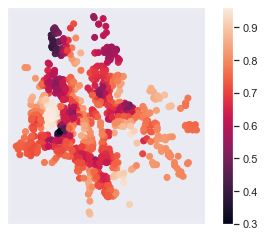

In [181]:
df_geo['R2'] = gwr_results.localR2
df_geo.plot('R2', legend = True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# plt.savefig('local_R2')
plt.show()

In [105]:
#Visualizing hypothesis tests for significance of parameter estimates
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search()
print(gwr_bw)

51.0


In [107]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit()

In [ ]:
# 'poczta_points', 'dhl_points', 'ruch_points', 'dpd_points', 'ups_points', 'TOT','FEM_RATIO'

In [182]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 940
Number of covariates:                                                     8

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           3507.041
Log-likelihood:                                                   -1952.627
AIC:                                                               3921.254
AICc:                                                              3923.447
BIC:                                                              -2873.319
R2:                                                                   0.428
Adj. R2:                                                              0.424

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [108]:
#default behavior using corrected alpha
filter_tc = gwr_results.filter_tvals()

In [109]:
#without correction using common alpha
filter_t = gwr_results.filter_tvals(alpha = 0.05)

In [110]:
df_warszawa['rural'] = gwr_results.params[:, 1]
df_warszawa['rural_t'] = filter_t[:, 1]
df_warszawa['rural_tc'] = filter_tc[:, 1]

AttributeError: 'Line2D' object has no property 'edgecolor'

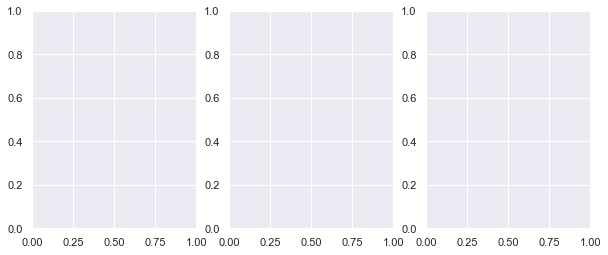

In [113]:
fig, ax = plt.subplots(1, 3, figsize = (10, 4))
df_warszawa.plot('rural', **{'edgecolor': 'black', 'alpha': .65, 'linewidth': .5}, ax = ax[0])
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title('Parameter estimates')

df_warszawa.plot('rural', **{'edgecolor': 'black', 'alpha': .65, 'linewidth': .5}, ax = ax[1])

df_warszawa[filter_t[:, 1] == 0].plot(color = 'grey', ax = ax[1], **{'edgecolor': 'black', 'linewidth': .5})
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title('Composite')

df_warszawa.plot('rural', **{'edgecolor': 'black', 'alpha': .65, 'linewidth': .5}, ax = ax[2])
df_warszawa[filter_tc[:, 1] == 0].plot(color = 'grey', ax = ax[2], **{'edgecolor': 'black', 'linewidth': .5})
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title('Composite with correction')

In [ ]:
#Visualizing hypothesis tests for significance of parameter estimates

#Manually set bandwidth to 50 and fit
gwr_model = GWR(g_coords, g_y, g_X, 50)
gwr_results = gwr_model.fit()

In [ ]:
#100 iterations
p_vals_100 = gwr_results.spatial_variability(gwr_selector, 100)
print(p_vals_100)

In [ ]:
#default is 1000 iterations
p_vals_1000 = gwr_results.spatial_variability(gwr_selector)
print(p_vals_1000)

In [ ]:
#2000 iterations
p_vals_2000 = gwr_results.spatial_variability(gwr_selector, 2000)
print(p_vals_2000)

In [ ]:
>>> gwr_selector = Sel_BW(g_coords, g_y, g_X)
>>> gwr_bw = gwr_selector.search()
>>> print(gwr_bw)
117.0
>>> gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
>>> gwr_results = gwr_model.fit()
>>> LCC, VIF, CN, VDP = gwr_results.local_collinearity()
>>> names = ['Foreign Born vs. African American',
'Foreign Born vs. Rural',
'African American vs. Rural']
>>> fig, ax = plt.subplots(1, 3, figsize = (12, 4))
>>> for col in range(3):
georgia['vif'] = LCC[:, col]
georgia.plot('vif', ax = ax[col], legend = True)
ax[col].set_title('LCC: ' + names[col])
ax[col].get_xaxis().set_visible(False)
ax[col].get_yaxis().set_visible(False)
>>> names = ['Foreign Born', 'African American', 'Rural']
>>> fig, ax = plt.subplots(1, 3, figsize = (12, 4))
>>> for col in range(3):
georgia['vif'] = VIF[:, col]
georgia.plot('vif', ax = ax[col], legend = True)
ax[col].set_title('VIF: ' + names[col])
ax[col].get_xaxis().set_visible(False)
ax[col].get_yaxis().set_visible(False)
>>> fig, ax = plt.subplots(1, 1, figsize = (4, 4))
>>> georgia['cn'] = CN
>>> georgia.plot('cn', legend = True, ax = ax)
>>> ax.set_title('Condition Number')
>>> ax.get_xaxis().set_visible(False)
>>> ax.get_yaxis().set_visible(False)
>>> names = ['Intercept', 'Foreign Born', 'African American', 'Rural']
>>> fig, ax = plt.subplots(1, 4, figsize = (16, 4))
>>> for col in range(4):
georgia['vdp'] = VDP[:, col]
georgia.plot('vdp', ax = ax[col], legend = True)
ax[col].set_title('VDP: ' + names[col])
ax[col].get_xaxis().set_visible(False)
ax[col].get_yaxis().set_visible(False)